In [1]:
import pandas as pd
import numpy as np
from PIL import Image

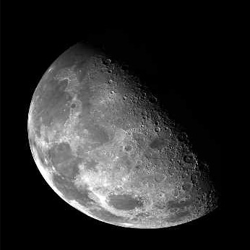

In [2]:
img = Image.open('images/moon.jpeg').convert('L').resize((250,250))
img

In [3]:
imgMat = np.array(img)
imgMat

array([[7, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Blur using Box Filter

In [4]:
n = 5
def nineMul(i,j,mat):
    diff = [x for x in range(-n,n+1)]
    ct = 0
    prod = 0
    for dx in diff:
        if (i + dx) >= 0 and (i + dx) < len(mat):
            for dy in diff:
                if (j + dy) >= 0 and (j + dy) < len(mat[0]):
                    ct += 1
                    prod += mat[i + dx][j + dy]
    return prod // ct

In [13]:
blurMat = imgMat.copy()
for i in range(len(imgMat)):
    for j in range(len(imgMat[0])):
        blurMat[i][j] = min(max(0,imgMat[i][j] -  nineMul(i,j,blurMat)),255)

In [6]:
fin = Image.fromarray(blurMat)

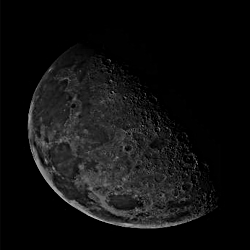

In [7]:
fin

In [8]:
fin.save('images/unsharp1.jpeg')

In [9]:
blurMat = imgMat.copy()
k = 1
for i in range(len(imgMat)):
    for j in range(len(imgMat[0])):
        blurMat[i][j] = min(max(0,imgMat[i][j] + k*(imgMat[i][j] -  nineMul(i,j,blurMat))),255)

In [10]:
fin = Image.fromarray(blurMat)

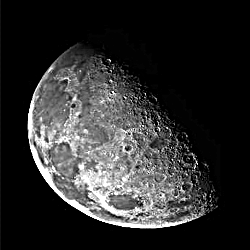

In [11]:
fin

In [12]:
fin.save('images/unsharp2.jpeg')